<a href="https://colab.research.google.com/github/snehapvt212001-commits/prediction/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #unpickling the files
import pickle
with open('/images.p',"rb") as f:
  images=pickle.load(f)
with open('/labels.p',"rb") as f:
  labels=pickle.load(f)
import matplotlib.pyplot as plt


In [ ]:
print(images.shape)
print(labels.shape)

(1548, 100, 100)
(1548,)


In [ ]:
labels

array(['daisy', 'daisy', 'daisy', ..., 'rose', 'rose', 'rose'],
      dtype='<U5')

In [ ]:
set(labels)

{np.str_('daisy'), np.str_('rose')}

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
labels=le.fit_transform(labels)

In [ ]:
le.inverse_transform([0])

array(['daisy'], dtype='<U5')

In [ ]:
p=len(set(labels))
print("total num of flowers",p)

total num of flowers 2


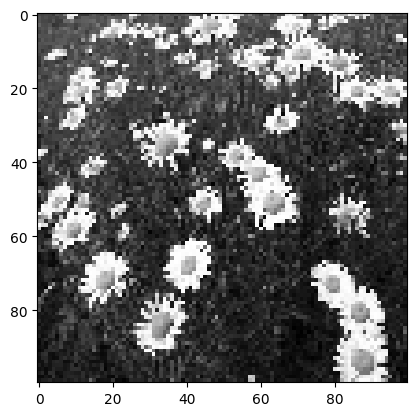

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[200],cmap='gray')
plt.show()

In [ ]:
import numpy as np
import cv2

In [ ]:
def preprocessing(img):
  img=cv2.equalizeHist(img)
  img=img.reshape(100,100,1)
  img=img/255
  return img


In [ ]:
images=np.array(list(map(preprocessing,images)))
print("shape of input:",images.shape)

shape of input: (1548, 100, 100, 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and test sets (90% train, 10% test here)
xtr, xts, ytr, yts = train_test_split(images, labels, test_size=0.1, random_state=42)

In [ ]:
print("Xtr shape:", xtr.shape)
print("Ytr shape:", ytr.shape)
print("xts shape:", xts.shape)
print("yts shape:", yts.shape)


Xtr shape: (1393, 100, 100, 1)
Ytr shape: (1393,)
xts shape: (155, 100, 100, 1)
yts shape: (155,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.2,
                           zoom_range=0.2,shear_range=0.1,rotation_range=10)# explain this

In [ ]:
datagen.fit(images)

In [ ]:
batches=datagen.flow(xtr,ytr,batch_size=15)
X_batch,y_batch=next(batches)

In [ ]:
from tensorflow.keras.utils import to_categorical

ytr = to_categorical(ytr, num_classes=2)
yts = to_categorical(yts, num_classes=2)


In [ ]:
xtr = np.repeat(xtr, 3, axis=-1)
xts = np.repeat(xts, 3, axis=-1)


In [ ]:
print("Xtr shape:", xtr.shape)
print("Ytr shape:", ytr.shape)
print("xts shape:", xts.shape)
print("yts shape:", yts.shape)


Xtr shape: (1393, 100, 100, 3)
Ytr shape: (1393, 2)
xts shape: (155, 100, 100, 3)
yts shape: (155, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Model


In [ ]:
# Load the pre-trained VGG16 model (excluding the top layers)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(100, 100, 3))

# Add custom top layers to the VGG16 model
x = Flatten()(base_model.output)
x = Dense(4096, activation="relu")(x)
x = Dense(4096, activation="relu")(x)
x = Dense(2, activation="softmax")(x)

# Create the new model by combining the base VGG16 model and the custom top layers
model = Model(inputs=base_model.input, outputs=x)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Print the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    18,878,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,382,658 (192.19 MB)

 Trainable params: 35,667,970 (136.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Compile the model
h=model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])


In [ ]:
# Train the model
h=model.fit(xtr, ytr, batch_size=128, epochs=50, validation_split=0.1)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5208 - loss: 423.1445 - val_accuracy: 0.5214 - val_loss: 7.2307
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 166ms/step - accuracy: 0.5794 - loss: 3.5257 - val_accuracy: 0.6714 - val_loss: 1.9996
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.7159 - loss: 1.5143 - val_accuracy: 0.8357 - val_loss: 0.4168
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.8358 - loss: 0.4934 - val_accuracy: 0.8500 - val_loss: 0.3057
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.8672 - loss: 0.3173 - val_accuracy: 0.8429 - val_loss: 0.3035
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.8893 - loss: 0.2784 - val_accuracy: 0.8786 - val_loss: 0.3097
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.9269 - loss: 0.1947 - val_accuracy: 0.8500 - val_loss: 0.3227
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9313 - loss: 0.1748 - val_accuracy: 0

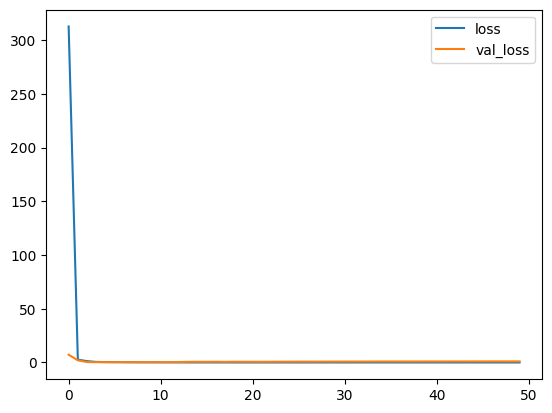

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])

In [ ]:
model.save("final_model.h5")

In [ ]:
from google.colab import files
upload=files.upload()

Saving daisy_ (126).jpg to daisy_ (126).jpg


In [ ]:
d=list(upload.keys())[0]
print(d)

daisy_ (126).jpg
